# **Hand Gesture Recognition Model**

In [4]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [5]:
DATASET_PATH = r"C:/Users/HP/Documents/PRODIGY_INTERSHIP_ML/PRODIGY_ML_4/train_3"

IMAGE_SIZE = (128, 128)

label_map = {}
X = []
y = []


In [6]:
class_id = 0

for folder in os.listdir(DATASET_PATH):
    folder_path = os.path.join(DATASET_PATH, folder)

    if not os.path.isdir(folder_path):
        continue

    label_map[folder] = class_id
    print("Loading:", folder)

    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)

        img = cv2.imread(img_path)

        if img is None:
            continue

        img = cv2.resize(img, IMAGE_SIZE)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        feature, _ = hog(
            gray,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            visualize=True
        )

        X.append(feature)
        y.append(class_id)

    class_id += 1

X = np.array(X)
y = np.array(y)

print("Total samples:", len(X))
print("Classes:", label_map)


Loading: 01_palm
Loading: 02_l
Loading: 03_fist
Loading: 04_fist moved
Loading: 05_thumb
Loading: 06_index
Loading: 07_ok
Loading: 08_Palm moved
Loading: 09_c
Loading: 10_down
Total samples: 2000
Classes: {'01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist moved': 3, '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_Palm moved': 7, '09_c': 8, '10_down': 9}


In [7]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train:", X_train.shape, "Validation:", X_val.shape)


Train: (1600, 8100) Validation: (400, 8100)


In [8]:
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train, y_train)

print("Training completed.")


Training completed.


In [9]:
y_pred = svm_model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        44
           8       1.00      1.00      1.00        48
           9       1.00      1.00      1.00        42

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



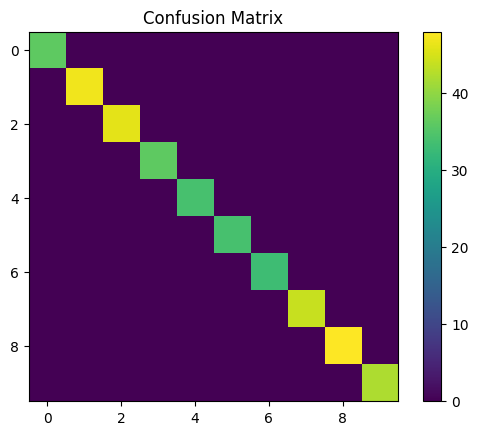

In [10]:
cm = confusion_matrix(y_val, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()


In [11]:
def predict_gesture(image_path):
    if not os.path.exists(image_path):
        return "Error: Path does not exist!"

    img = cv2.imread(image_path)
    if img is None:
        return "Error: Cannot read image!"

    img = cv2.resize(img, IMAGE_SIZE)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    feature, _ = hog(
        gray,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True
    )

    pred = svm_model.predict([feature])[0]

    class_name = list(label_map.keys())[list(label_map.values()).index(pred)]
    return class_name


In [12]:
test_image = r"C:/Users/HP/Documents/PRODIGY_INTERSHIP_ML/PRODIGY_ML_4/test_3/frame_02_01_0009.png"

gesture = predict_gesture(test_image)
print("Predicted gesture:", gesture)


Predicted gesture: 01_palm


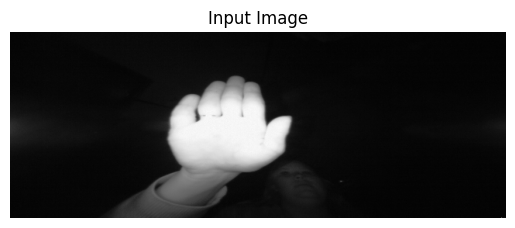

In [13]:
plt.imshow(cv2.cvtColor(cv2.imread(test_image), cv2.COLOR_BGR2RGB))
plt.title("Input Image")
plt.axis("off")
plt.show()
